### Kolokwium 22.05.2022

Mateusz Szybiak, Informatyka niestacjonarnie, semestr II, stopień II

In [1]:
import re
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix
from sklearn.preprocessing import normalize
from sklearn import metrics
from sklearn.feature_extraction.text import (
    CountVectorizer
)
from wordcloud import WordCloud
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore", category=ConvergenceWarning)

In [2]:
def cleaning_text(text: str) -> str:
    ret_text = text
    
    ret_text = re.sub(r"://", '', ret_text)

    # remove emoticons
    ret_text = re.sub(r":[^0-9a-zA-Z. ]+|;[^0-9a-zA-Z. ]+", '', ret_text)

    ret_text = ret_text.lower()

    # remove numbers
    ret_text = re.sub(r"\d+\s|\d+", ' ', ret_text)

    # remove html
    ret_text = re.sub(r"<[^>]*>", '', ret_text)  

    # remove punctuation marks
    ret_text = re.sub(r"[^0-9a-zA-Z ]+", '', ret_text)

    ret_text = ret_text.strip()

    # remove additional whitespaces
    ret_text = re.sub(r"\s+", ' ', ret_text)

    return ret_text


def remove_stop_words(text: list) -> list:
    stop_words = set(stopwords.words('english'))
    list_of_words = text
    return [word for word in list_of_words if word not in stop_words]


def stemming(list_of_words: list) -> list:
    porter = PorterStemmer()
    return [porter.stem(word) for word in list_of_words]


def bag_of_words(words: list) -> dict:
    bow = {}
    for word in words:
        if word not in bow.keys():
            bow[word] = 1
        else:
            bow[word] += 1
    return bow


def text_tokenizer(text: str) -> list:
    text_working = text
    text_working = cleaning_text(text_working)
    text_working_list = text_working.split(" ")
    text_working_list = stemming(text_working_list)
    text_working_list = remove_stop_words(text_working_list)

    return [word for word in text_working_list if len(word) > 3]
    
    
def plot(df):
    fig, ax = plt.subplots(figsize=(10,5))
    counts = list(pd.DataFrame(df["rating"].value_counts())['rating'])

    ax.bar(np.arange(0,len(counts),1), counts, color=['yellowgreen','darkred', "blue", 'orange', 'forestgreen'], tick_label=pd.DataFrame(df["rating"].value_counts()).index)
    plt.title("Distribution of rating")
    plt.xlabel("Rating of product")
    plt.ylabel("Volume of ratings")
    plt.show()

    
def wordcloud(bow):
    wc = WordCloud()
    wc.generate_from_frequencies(bow)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [3]:
df = pd.read_csv('alexa_reviews.csv', sep=";", encoding='cp1252')
df = df[["rating", "verified_reviews"]]
df["rating"]=df["rating"].apply(str)
df

,rating,verified_reviews
0,5,Love my Echo!
1,5,Loved it!
2,4,"Sometimes while playing a game, you can answer..."
3,5,I have had a lot of fun with this thing. My 4 ...
4,5,Music
...,...,...
3142,5,"Perfect for kids, adults and everyone in betwe..."
3143,5,"Listening to music, searching locations, check..."
3144,5,"I do love these things, i have them running my..."
3145,5,Only complaint I have is that the sound qualit...


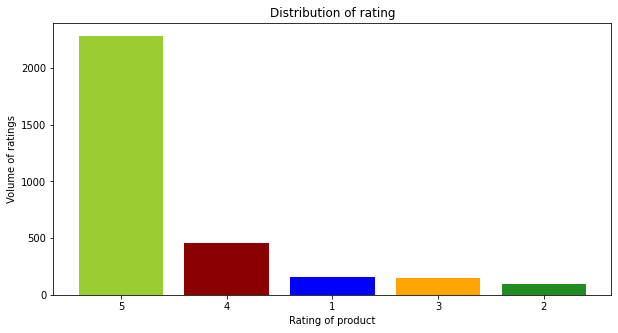

In [4]:
plot(df)

In [5]:
df['rating'].value_counts()

5    2284
4     454
1     161
3     152
2      96
Name: rating, dtype: int64

In [6]:
string_reviews = ""
for i in tqdm(range(len(df['verified_reviews']))):
    string_reviews += df['verified_reviews'].iloc[i] + " "

100%|███████████████████████████████████████████████████████████████████████████| 3147/3147 [00:00<00:00, 97789.82it/s]


In [7]:
stemmed_text = stemming(remove_stop_words(cleaning_text(string_reviews).split()))
bow = bag_of_words(stemmed_text)

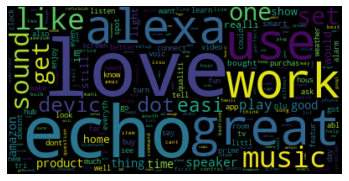

In [8]:
wordcloud(bow)

In [9]:
vectorizer = CountVectorizer(tokenizer=text_tokenizer)
X_transform = vectorizer.fit_transform(df['verified_reviews'])

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X_transform, df['rating'], test_size=0.3, random_state=42)

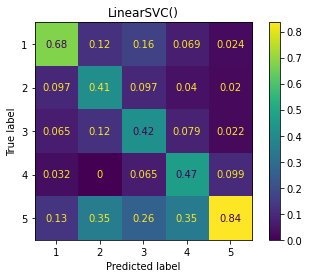

              precision    recall  f1-score   support

           1       0.68      0.40      0.50        53
           2       0.41      0.22      0.29        32
           3       0.42      0.31      0.36        42
           4       0.47      0.37      0.41       126
           5       0.84      0.92      0.88       692

    accuracy                           0.77       945
   macro avg       0.56      0.44      0.49       945
weighted avg       0.74      0.77      0.75       945



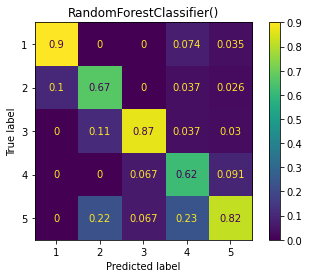

              precision    recall  f1-score   support

           1       0.90      0.34      0.49        53
           2       0.67      0.19      0.29        32
           3       0.87      0.31      0.46        42
           4       0.62      0.40      0.48       126
           5       0.82      0.97      0.89       692

    accuracy                           0.80       945
   macro avg       0.77      0.44      0.52       945
weighted avg       0.79      0.80      0.77       945



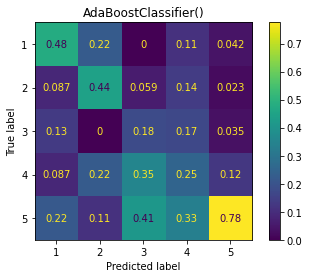

              precision    recall  f1-score   support

           1       0.48      0.21      0.29        53
           2       0.44      0.12      0.20        32
           3       0.18      0.07      0.10        42
           4       0.25      0.07      0.11       126
           5       0.78      0.96      0.86       692

    accuracy                           0.73       945
   macro avg       0.42      0.29      0.31       945
weighted avg       0.65      0.73      0.67       945



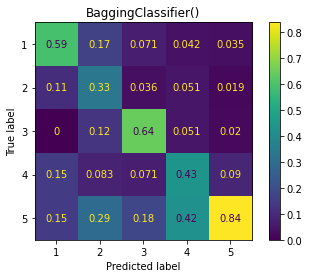

              precision    recall  f1-score   support

           1       0.59      0.30      0.40        53
           2       0.33      0.25      0.29        32
           3       0.64      0.43      0.51        42
           4       0.43      0.40      0.42       126
           5       0.84      0.90      0.87       692

    accuracy                           0.76       945
   macro avg       0.57      0.46      0.50       945
weighted avg       0.74      0.76      0.75       945



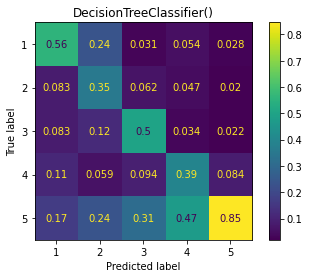

              precision    recall  f1-score   support

           1       0.56      0.38      0.45        53
           2       0.35      0.19      0.24        32
           3       0.50      0.38      0.43        42
           4       0.39      0.46      0.42       126
           5       0.85      0.87      0.86       692

    accuracy                           0.74       945
   macro avg       0.53      0.46      0.48       945
weighted avg       0.74      0.74      0.74       945



In [11]:
classifiers = [LinearSVC(), RandomForestClassifier(), AdaBoostClassifier(), BaggingClassifier(), DecisionTreeClassifier()]
for clf in classifiers:
    fig, ax = plt.subplots(1,1)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    cm = normalize(cm, axis=0, norm='l1')
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    ax.title.set_text(f"{clf}")
    disp.plot(ax=ax)
    plt.show()
    cr = classification_report(y_test, y_pred, target_names=clf.classes_)
    print(cr)

Najlepszym klasyfikatorem wydaje się być RandomForestClassifier. Posiada on najwyższy wskaźnik accuracy oraz najwyższe wartości precision dla poszczególnych klas. W kwestii parametru recall, to jego wartości nie odstają od innych klasyfikatorów o sensownych wynikach.